Load Dataset

In [1]:
!unzip /content/shared_articles.csv.zip 

Archive:  /content/shared_articles.csv.zip
  inflating: shared_articles.csv     


In [2]:
!unzip /content/users_interactions.csv.zip

Archive:  /content/users_interactions.csv.zip
  inflating: users_interactions.csv  


In [3]:
import pandas as pd

shared_articles = pd.read_csv("/content/shared_articles.csv")
users_interactions = pd.read_csv("/content/users_interactions.csv")

print("Total shared article", len(shared_articles.contentId))
print("Total user interaction with articles", len(users_interactions.personId))

Total shared article 3122
Total user interaction with articles 72312


Exploratory Data for Shared Article

In [4]:
shared_articles.head(3)

,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
0,1459192779,CONTENT REMOVED,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en


In [5]:
shared_articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3122 entries, 0 to 3121
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   timestamp        3122 non-null   int64 
 1   eventType        3122 non-null   object
 2   contentId        3122 non-null   int64 
 3   authorPersonId   3122 non-null   int64 
 4   authorSessionId  3122 non-null   int64 
 5   authorUserAgent  680 non-null    object
 6   authorRegion     680 non-null    object
 7   authorCountry    680 non-null    object
 8   contentType      3122 non-null   object
 9   url              3122 non-null   object
 10  title            3122 non-null   object
 11  text             3122 non-null   object
 12  lang             3122 non-null   object
dtypes: int64(4), object(9)
memory usage: 317.2+ KB


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


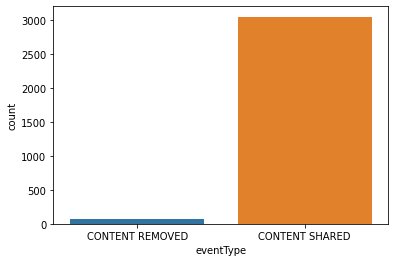

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(shared_articles['eventType'])

Because of 'content remove' is mean that the article content is not available, then 'content remove' will be dropped from the dataset

In [7]:
shared_article = shared_articles[shared_articles['eventType'] == 'CONTENT SHARED']
shared_article.head(3)

,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
1,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,CONTENT SHARED,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


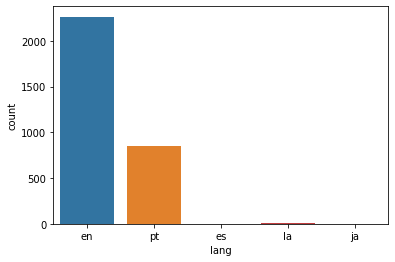

In [8]:
sns.countplot(shared_articles['lang'])

In [9]:
shared_articles.lang.value_counts()

en    2264
pt     850
la       4
es       2
ja       2
Name: lang, dtype: int64

In [10]:
shared_articles[shared_articles.lang.isin(['la', 'es', 'ja'])].text.tolist()

['San José, 22 abr (EFE).- Autoridades de Costa Rica presentaron hoy, en el marco del Día de la Tierra, el primer edificio del país construido en parte con Reciclam, un material elaborado a partir de empaques de tetra pak. Se trata del Centro de Gestión y Educación Ambiental (Cegea) del estatal Parque La Libertad, situado en la localidad de Desamparados, en el sector su de San José. El Cegea, que tiene una extensión de 725,6 metros cuadrados, comenzó a ser construido en julio de 2015 y se emplearon aproximadamente 250 láminas de Reciclam para el acondicionamiento de las paredes internas y el mobiliario, informó el Gobierno en un comunicado. El material reciclado fue donado por la Cooperativa de Productores de Leche Dos Pinos R.L. "El Cegea se constituye como un espacio para promover la recuperación y el fortalecimiento de la educación ambiental. Si queremos ser ciudades sostenibles y hacer de los objetivos globales de desarrollo sostenible un componente personal, hay que educar a la po

Because of la, es, and ja language is rare overall of the all language, then it will be dropped

In [11]:
shared_article = shared_article[shared_articles.lang.isin(['en', 'pt'])]
shared_article.head(3)

<ipython-input-11-6c3321bbe87a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  shared_article = shared_article[shared_articles.lang.isin(['en', 'pt'])]


,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
1,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,CONTENT SHARED,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en


Exploratory Data for Users Interaction

In [12]:
users_interactions.head(5)

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,NaN,NaN,NaN


In [13]:
users_interactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72312 entries, 0 to 72311
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    72312 non-null  int64 
 1   eventType    72312 non-null  object
 2   contentId    72312 non-null  int64 
 3   personId     72312 non-null  int64 
 4   sessionId    72312 non-null  int64 
 5   userAgent    56918 non-null  object
 6   userRegion   56907 non-null  object
 7   userCountry  56918 non-null  object
dtypes: int64(4), object(4)
memory usage: 4.4+ MB


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


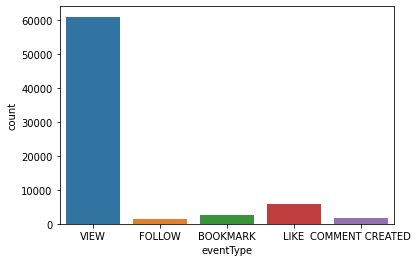

In [14]:
sns.countplot(users_interactions['eventType'])

Because of the differences interaction types of users, then we will ordering it according to the most high interaction type with the most high value, in this case 'comment created' is the most high interaction

In [15]:
event_typeStrength = {'VIEW':1.0,
                  'LIKE':2.0,
                  'BOOKMARK':3.0,
                  'FOLLOW':4.0,
                  'COMMENT CREATED':5.0}
users_interactions['eventStrength'] = users_interactions['eventType'].apply(lambda x: event_typeStrength[x])
users_interactions.head(3)

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry,eventStrength
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN,1.0
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US,1.0
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN,1.0


In [16]:
users_interactions.userRegion.value_counts()

SP    40164
MG    10229
NY     1257
TX      923
GA      910
      ...  
R         1
CE        1
NH        1
MN        1
CL        1
Name: userRegion, Length: 71, dtype: int64

In [17]:
users_interactions.userCountry.value_counts()

BR    51396
US     4657
KR      239
CA      226
JP      144
AU      138
GB       22
DE       19
IE       14
IS       13
ZZ       11
SG       11
AR        7
PT        6
ES        3
IN        3
MY        2
IT        2
CN        1
NL        1
CL        1
CO        1
CH        1
Name: userCountry, dtype: int64

Data Preprocessing

Because of the system will be hard to make recommendation (from the user preference) for users that only have a little of interaction with the article, then we will limit it with only users with > 3 will be proceed

users_interactionCount to count the length of the row in the data according to each personId with its contentId (count how much content that interact with user). 

users_interactionLimit to count user_interactionCount with only > 3 interaction 

In [18]:
users_interactionsCount = users_interactions.groupby(['personId', 'contentId']).size().groupby('personId').size()
print('all users: ', len(users_interactionsCount))
users_interactionsLimit = users_interactionsCount[users_interactionsCount > 3].reset_index()[['personId']]
print('users with at least 4 interactions: ', len(users_interactionsLimit))

all users:  1895
users with at least 4 interactions:  1249


In [19]:
print('all interactions: ', len(users_interactions))
interactions_usersSelected = users_interactions.merge(users_interactionsLimit,
                                                      how = 'right',
                                                      left_on = 'personId',
                                                      right_on = 'personId')
print('interactions with at least 4 interactions: ', len(interactions_usersSelected))

all interactions:  72312
interactions with at least 4 interactions:  70549


In [20]:
users_interactions.head()

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry,eventStrength
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN,1.0
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US,1.0
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN,1.0
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN,4.0
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,NaN,NaN,NaN,1.0


In [21]:
"""import nltk
nltk.download('stopwords')"""

"import nltk\nnltk.download('stopwords')"

In [22]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Merge the two datasets
merged_data = pd.merge(users_interactions, shared_article, on='contentId')

# Create the user-item matrix
user_item_matrix = merged_data.pivot_table(index='personId', columns='contentId', values='eventStrength', aggfunc='mean').fillna(0)

print(merged_data)

       timestamp_x eventType_x            contentId             personId  \
0       1465413032        VIEW -3499919498720038879 -8845298781299428018   
1       1465413046        VIEW -3499919498720038879 -8845298781299428018   
2       1465907360        VIEW -3499919498720038879  -108842214936804958   
3       1465583412        VIEW -3499919498720038879 -1443636648652872475   
4       1465582468        VIEW -3499919498720038879 -1443636648652872475   
...            ...         ...                  ...                  ...   
72169   1482929120        VIEW -7108012586837980940 -4028919343899978105   
72170   1483616272        VIEW  7526977287801930517 -3643155458357242906   
72171   1485429106        VIEW  -282629989972409543  5660542693104786364   
72172   1485429066        VIEW -6468782714472551646  5660542693104786364   
72173   1485868866        VIEW -9040419159428373932 -7496361692498935601   

                 sessionId                                          userAgent  \
0     

Model development: Content Based Filtering

In [23]:
# Compute the cosine similarity between the item-item matrix and the user-item matrix
item_item_similarity = cosine_similarity(user_item_matrix.T)
user_item_similarity = cosine_similarity(user_item_matrix)

In [24]:
# Make recommendations
def recommend_articles(user_id, item_item_similarity, user_item_matrix):
    item_index = user_item_matrix.columns
    user_vector = user_item_matrix.loc[user_id].values.reshape(-1, 1)
    scores = item_item_similarity.dot(user_vector)
    scores = pd.DataFrame(scores, index=item_index, columns=['score'])
    scores = scores.sort_values('score', ascending=False)
    return scores.index[:10].tolist()

In [25]:
def get_article_info(article_id, article_data):
    """Retrieve the title and text of an article given its ID."""
    title = article_data.loc[article_id]['title']
    text = article_data.loc[article_id]['text']
    return title, text

article_data = shared_article

# Set the index of the article data DataFrame to the article IDs
article_data.set_index('contentId', inplace=True)

In [26]:
# Recommend articles for a specific user
user_id = 344280948527967603
recommended_articles = recommend_articles(user_id, item_item_similarity, user_item_matrix)

# Print the title and text of each recommended article
print(f"{recommended_articles}")
for article_id in recommended_articles:
    title, text = get_article_info(article_id, article_data)
    print(f"Title: {title}")

[4876769046116846438, 310515487419366995, -908052164352446106, 3569727790804487273, 8254285966695461849, -5784991738549272379, -1068603220639552685, 521382866757596943, -3723217532224917485, -4974757204495953627]
Title: Shopping em BH terá fazenda urbana de 2.700 m²
Title: 71 erros de português que precisam sumir dos seus e-mails
Title: IoT a favor do relacionamento médico-paciente
Title: DualShock 4 Repair
Title: Dr. consulta: uma revolução no setor da saúde
Title: NodeMCU (ESP8266) o módulo que desbanca o Arduino e facilitará a Internet das Coisas...
Title: Onde a tecnologia e o cuidado se encontram? - Saúde Business
Title: Optimize Arduino Memory Usage
Title: 11 Internet of Things (IoT) Protocols You Need to Know About
Title: Alecrim/AlecrimCoreData


Evaluating model with precision and recall

In [27]:
# Use user_id same as the previous cell
user_id = 344280948527967603
recommended_articles = recommend_articles(user_id, item_item_similarity, user_item_matrix)

# Get the ground truth articles for the user
truth_articles = users_interactions[users_interactions.personId == user_id]['contentId'].tolist()
truth_articles

[310515487419366995,
 310515487419366995,
 310515487419366995,
 310515487419366995,
 310515487419366995,
 3569727790804487273,
 310515487419366995,
 -5784991738549272379,
 -5784991738549272379,
 310515487419366995,
 310515487419366995,
 -1068603220639552685,
 521382866757596943,
 521382866757596943,
 521382866757596943,
 521382866757596943,
 -908052164352446106,
 8254285966695461849,
 4876769046116846438,
 4876769046116846438,
 4876769046116846438,
 4876769046116846438,
 4876769046116846438,
 4876769046116846438,
 4876769046116846438]

In [28]:
# Compute precision and recall
true_positives = len(set(recommended_articles).intersection(truth_articles))
precision = true_positives / len(recommended_articles)
recall = true_positives / len(truth_articles)
print(f"Precision score: {precision} \n Recall score: {recall}")

Precision score: 0.8 
 Recall score: 0.32
